In [35]:
file_path = "/Users/rk/Desktop/employee_reviews.csv"

# Read file in binary mode and clean it
with open(file_path, "rb") as f:
    content = f.read().decode("utf-8", errors="replace")  # Replace invalid characters

# Save to a cleaned file
cleaned_file_path = "/Users/rk/Desktop/cleaned_employee_reviews.csv"
with open(cleaned_file_path, "w", encoding="utf-8") as f:
    f.write(content)

# Load cleaned file
df = pd.read_csv(cleaned_file_path)
print(df.head())


   Unnamed: 0 company                                               pros  \
0           1  google                      People are smart and friendly   
1           2  google  1) Food, food, food. 15+ cafes on main campus ...   
2           3  google  * If you're a software engineer, you're among ...   
3           4  google  You can't find a more well-regarded company th...   
4           5  google  Google is a world of its own. At every other c...   

                                                cons  overall-ratings  \
0                 Bureaucracy is slowing things down                5   
1  1) Work/life balance. What balance? All those ...                4   
2  * It *is* becoming larger, and with it comes g...                5   
3  I live in SF so the commute can take between 1...                5   
4  If you don't work in MTV (HQ), you will be giv...                5   

   work-balance-stars  culture-values-stars  career-opportunities-stars  \
0                 4.0        

In [50]:
print(df.columns)
print(df.isnull().sum())


Index(['company', 'pros', 'cons', 'overall-ratings', 'work-balance-stars',
       'culture-values-stars', 'career-opportunities-stars',
       'comp-benefit-stars', 'senior-management-stars'],
      dtype='object')
company                       0
pros                          0
cons                          0
overall-ratings               0
work-balance-stars            0
culture-values-stars          0
career-opportunities-stars    0
comp-benefit-stars            0
senior-management-stars       0
dtype: int64


In [52]:
df.columns = df.columns.str.replace("-", "_")  # Replace hyphens for easier access

num_cols = ['overall_ratings', 'work_balance_stars', 'culture_values_stars',
            'career_opportunities_stars', 'comp_benefit_stars', 'senior_management_stars']

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")
print(df.dtypes)  # Check column types


company                        object
pros                           object
cons                           object
overall_ratings                 int64
work_balance_stars            float64
culture_values_stars            int64
career_opportunities_stars    float64
comp_benefit_stars            float64
senior_management_stars       float64
dtype: object


In [54]:
df["Satisfaction"] = ((df["overall_ratings"] > df["overall_ratings"].mean()) &
                      (df["work_balance_stars"] > df["work_balance_stars"].mean()) &
                      (df["culture_values_stars"] > df["culture_values_stars"].mean()) &
                      (df["career_opportunities_stars"] > df["career_opportunities_stars"].mean()) &
                      (df["comp_benefit_stars"] > df["comp_benefit_stars"].mean()) &
                      (df["senior_management_stars"] > df["senior_management_stars"].mean())).astype(int)

print(df["Satisfaction"].value_counts())  # Count of satisfied vs unsatisfied employees


Satisfaction
0    51236
1    16293
Name: count, dtype: int64


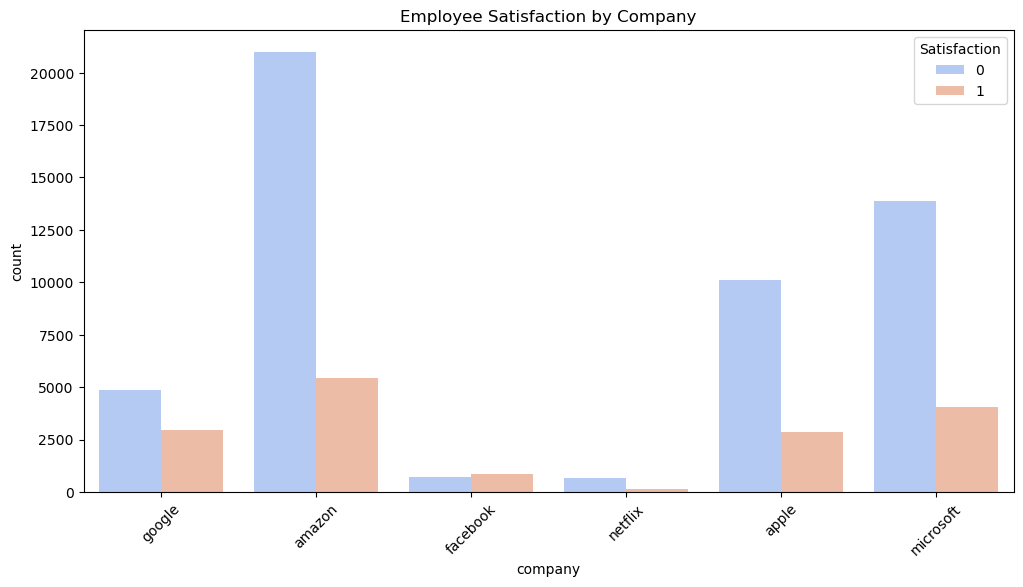

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(x="company", hue="Satisfaction", data=df, palette="coolwarm")
plt.title("Employee Satisfaction by Company")
plt.xticks(rotation=45)
plt.show()


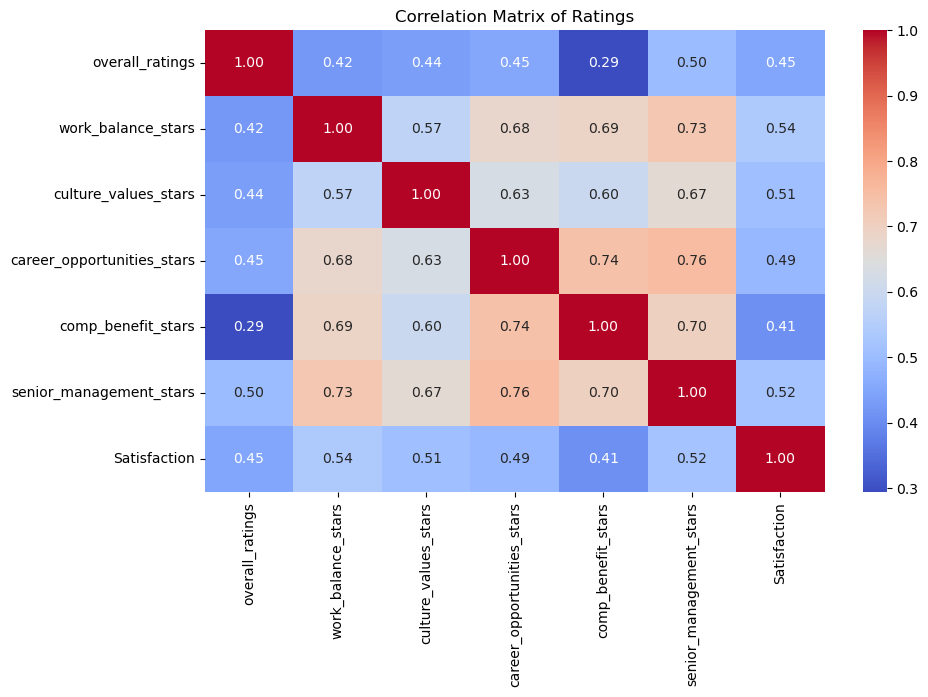

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols + ['Satisfaction']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Ratings")
plt.show()


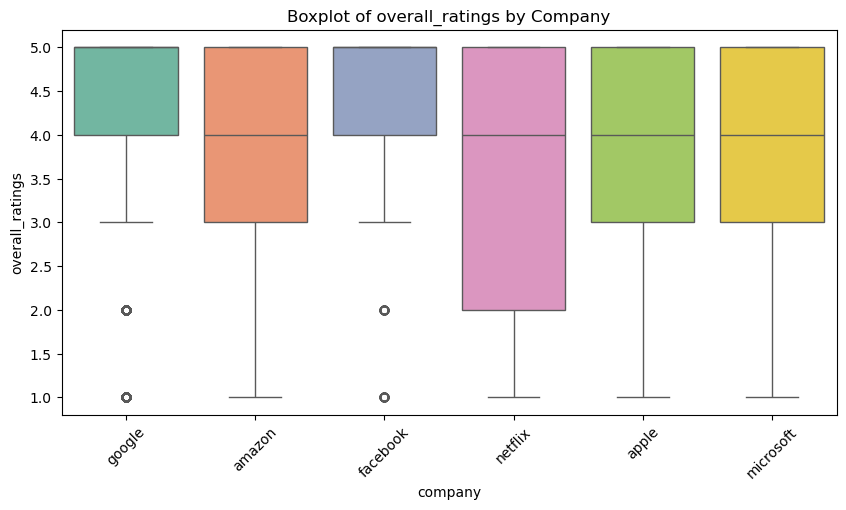

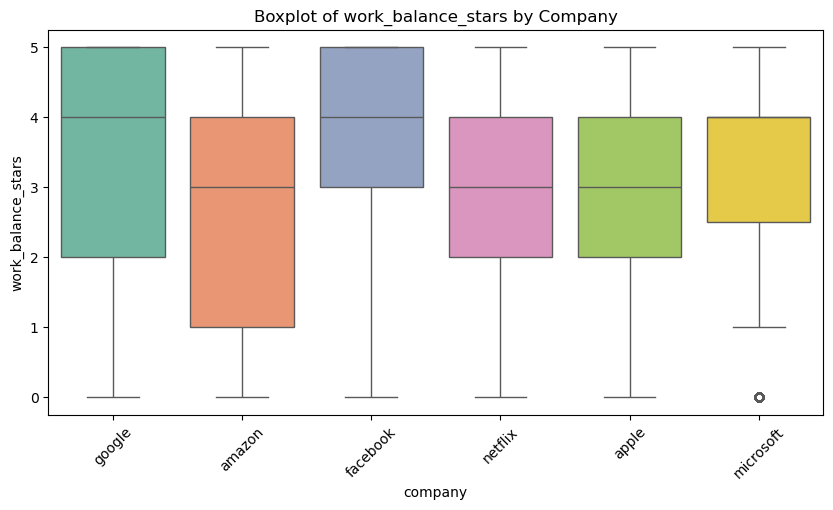

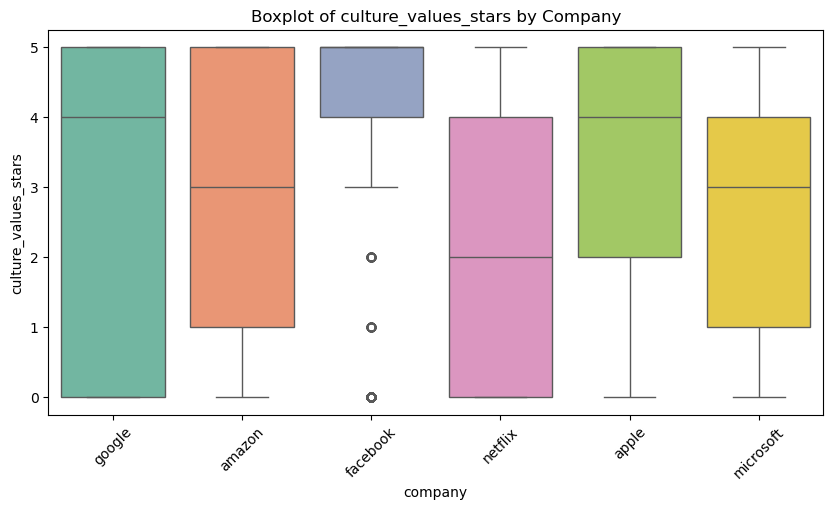

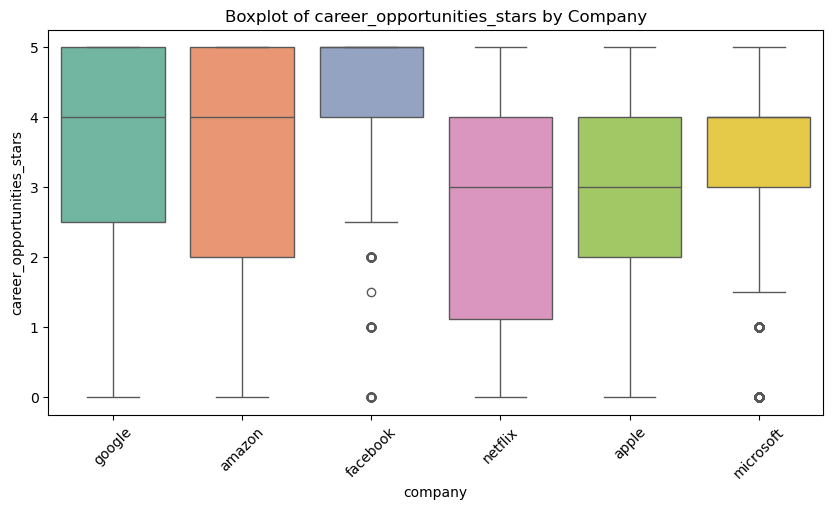

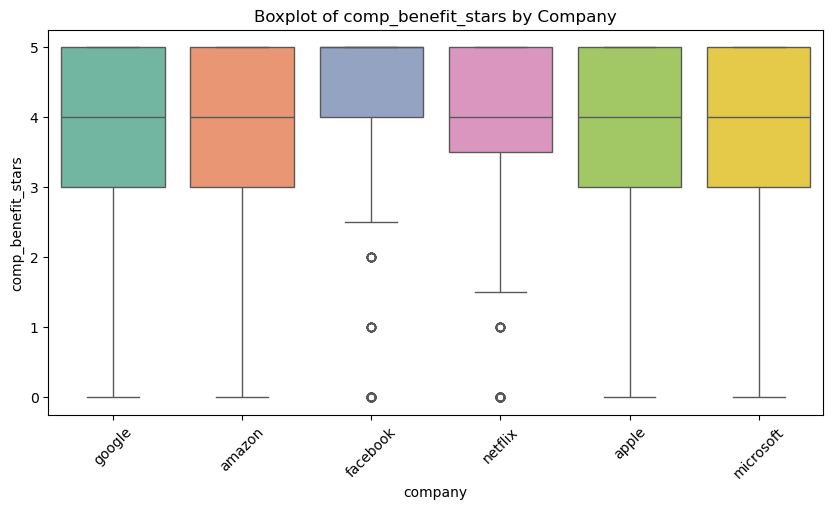

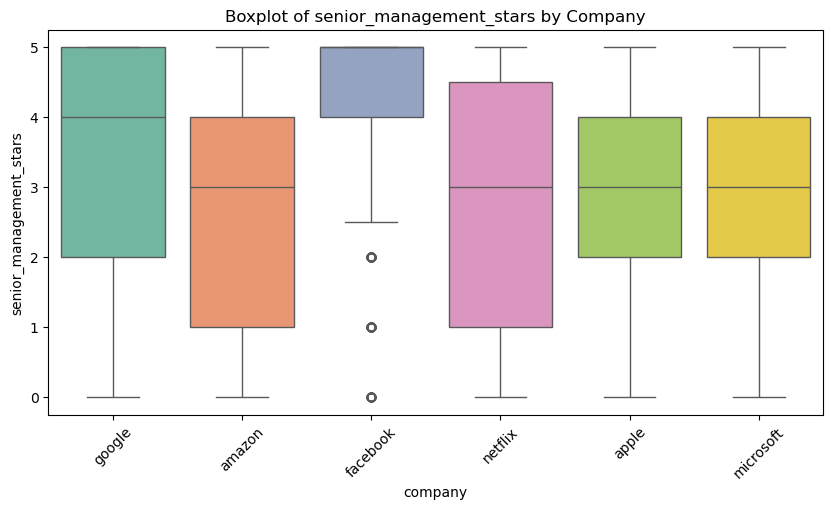

In [70]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x="company", y=col, hue="company", data=df, palette="Set2", dodge=False)
    plt.xticks(rotation=45)
    plt.title(f"Boxplot of {col} by Company")
    plt.legend([],[], frameon=False)  # Hide redundant legend
    plt.show()


In [62]:
from sklearn.model_selection import train_test_split

X = df[num_cols]  # Independent variables
y = df["Satisfaction"]  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


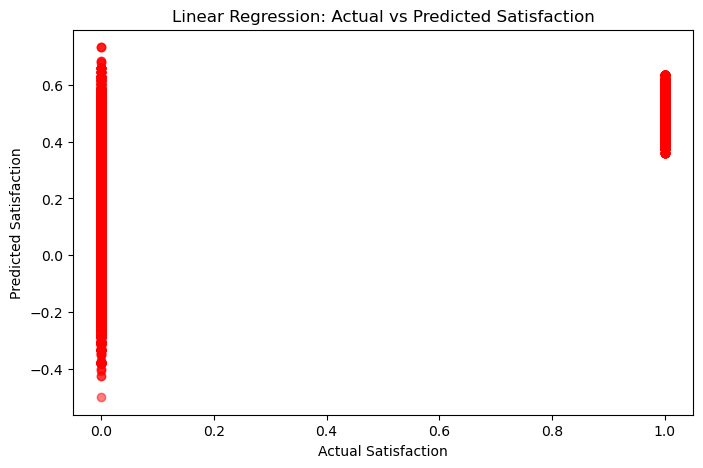

In [64]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_lm = lm.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lm, alpha=0.5, color="red")
plt.xlabel("Actual Satisfaction")
plt.ylabel("Predicted Satisfaction")
plt.title("Linear Regression: Actual vs Predicted Satisfaction")
plt.show()


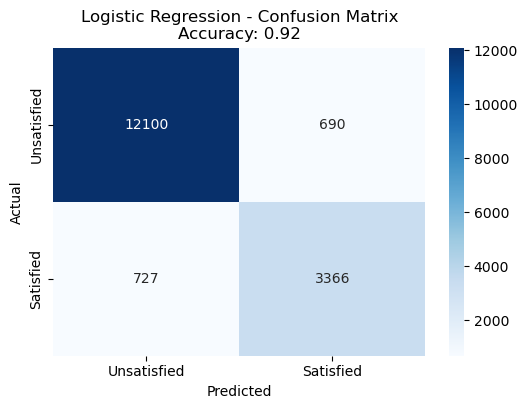

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Unsatisfied", "Satisfied"], yticklabels=["Unsatisfied", "Satisfied"])
plt.title(f"Logistic Regression - Confusion Matrix\nAccuracy: {acc:.2f}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
